## Assignment 1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
ndata = 100
mA = [ 1.0, 0.3]
sigmaA = 0.2
mB = [ 0.0, -0.1]
sigmaB = 0.1

classA = np.ones((ndata,3))
classB = np.ones((ndata,3))

classA[:50,0] = np.random.randn(1,round(0.5*ndata)) * sigmaA - mA[0]
classA[50:,0] = np.random.randn(1,round(0.5*ndata)) * sigmaA + mA[0]
classA[:,1] = np.random.randn(1,ndata) * sigmaA + mA[1]

classB[:,0] = np.random.randn(1,ndata) * sigmaB + mB[0]
classB[:,1] = np.random.randn(1,ndata) * sigmaB + mB[1]
classB[:,2] = -1

classA = classA.T
classB = classB.T

print(classA.shape)
print(classB.shape)

(3, 100)
(3, 100)


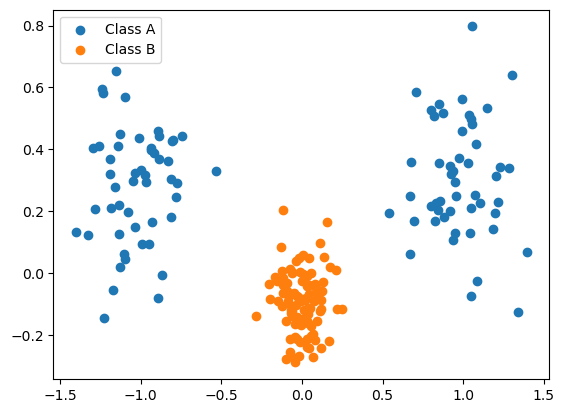

In [42]:
plt.scatter(classA[0],classA[1], label = "Class A")
plt.scatter(classB[0],classB[1], label = "Class B")
plt.legend()
plt.show()

In [129]:
def plot_learning_rate(mse,title, ylabel):
    plt.clf()        
    x_cords = np.arange(start=1,stop= len(mse)+1)
    plt.plot(x_cords, mse, linestyle= "-")
    plt.plot
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [44]:
class MLP():
    def __init__(self,nodes, inputs, lr = 0.1, alpha = 0.9):
        self.hidden_layer = np.random.randn(nodes, inputs+1,)
        self.output_layer = np.random.randn(1,nodes+1)
        self.activation_function = lambda x: (2/(1+np.exp(-x)))-1
        self.lr = lr
        self.alpha = alpha
        self.dw = 0
        self.dv = 0
        
    def epoch(self, input,targets):

        bias_input = np.vstack((input, np.ones(input.shape[1]).reshape(1,-1))) # Add ones for bias
        # Forward
        h_in = self.hidden_layer @ bias_input
        h_out = np.vstack((self.activation_function(h_in),np.ones(input.shape[1]).reshape(1,-1))) # Add ones for bias
        o_in = self.output_layer @ h_out
        out = self.activation_function(o_in)
        # Backward
        delta_output = 0.5*(out-targets)*(1+out)*(1-out)
        delta_hidden = 0.5*(self.output_layer.T@ delta_output)*(1+h_out)*(1-h_out)
        delta_hidden = delta_hidden[:2]
        # Update
        self.dw = (self.dw*self.alpha) - (1-self.alpha)*(delta_hidden @ bias_input.T)
        self.dv = (self.dv*self.alpha) - (1-self.alpha)*(delta_output @ h_out.T)

        self.hidden_layer += self.dw*self.lr
        self.output_layer += self.dv*self.lr
        # Update MSE error
        mse_error = np.mean((np.squeeze(out)-targets)**2)
        #print(mse_error)
        return mse_error
    
    def train(self,data, epochs):

        rng = np.random.default_rng()

        targets = data[2]
        input = data[:2]

        print("Initial boundary")
        self.plot_decision_boundaries(input, targets)
        mse = np.zeros(epochs)
        for i in range(epochs):
            rng.shuffle(data, axis=1)
            targets = data[2]
            input = data[:2]
            epoch_mse = self.epoch(input, targets)
            mse[i] = epoch_mse
        print("Final boundary")
        self.plot_decision_boundaries(input, targets)
        return mse
    
    def plot_decision_boundaries(self,input, targets):
        x = input[0]
        y = input[1]

        plt.scatter(x[targets > 0], y[targets > 0], label='Class A', s=10)
        plt.scatter(x[targets < 0], y[targets < 0], label='Class B', s=10)

        x_range = np.linspace(np.min(x), np.max(x), 100)
        for weights in self.hidden_layer:
            y_range = (-weights[2] - weights[0]*x_range) / weights[1]
            plt.plot(x_range, y_range, label='_Decision boundary', c="red")
        plt.ylim(-1,1)
        plt.xlim(-2,2)
        plt.legend()
        plt.show()


Initial boundary


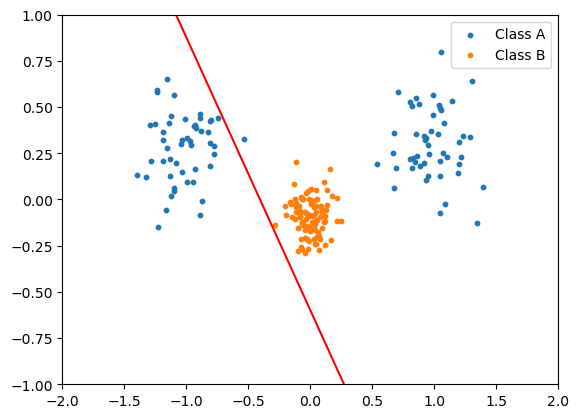

Final boundary


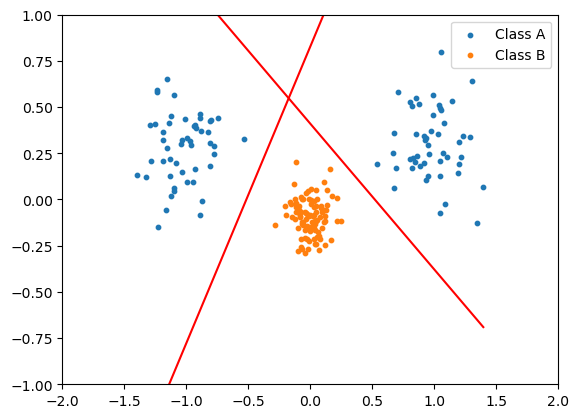

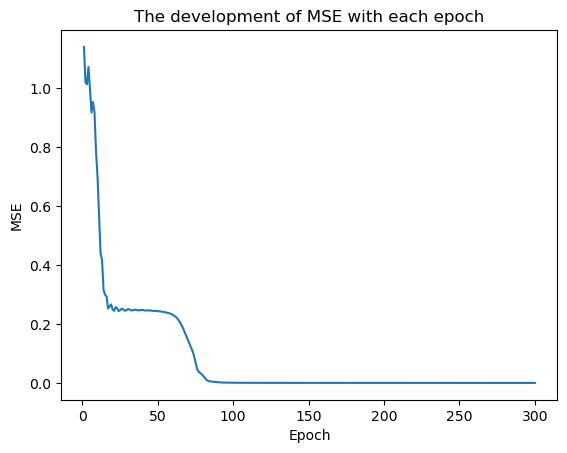

In [48]:
mlp_2 = MLP(nodes = 2, inputs = 2)
data = np.hstack((classA,classB))
mse = mlp_2.train(data, 300)
plot_learning_rate(mse, title="The development of MSE with each epoch",ylabel="MSE")


## Assignment 2

In [106]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [283]:
class Network(nn.Module):
    def __init__(self, hidden_1, hidden_2, lr=0.01):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(5,hidden_1, dtype=torch.float32)
        self.fc2 = nn.Linear(hidden_1,hidden_2, dtype=torch.float32)
        self.fc3 = nn.Linear(hidden_2,1, dtype=torch.float32)
        self.loss_criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(),lr = lr)
    
    def forward(self,input):
        c1 = F.sigmoid(self.fc1(input.to(torch.float32)))
        c2 = F.sigmoid(self.fc2(c1))
        c3 = self.fc3(c2)
        return c3
    

In [235]:
mackey_glass = lambda x,t: x[t] + 0.2*x[t-25]/(1+x[t-25]**10) - 0.1*x[t]

def split_data(X):

    batch = np.zeros((5,1200),dtype=np.float32)

    batch[0] = X[280:1500-20]
    batch[1] = X[285:1500-15]
    batch[2] = X[290:1500-10]
    batch[3] = X[295:1500-5]
    batch[4] = X[300:1500]

    targets = np.array(X[305:1505],dtype=np.float32)

    batch = batch.T

    train_batch = torch.from_numpy(batch[0:800])
    val_batch = torch.from_numpy(batch[800:1000])
    test_batch = torch.from_numpy(batch[1000:1200])

    train_targets = torch.from_numpy(targets[0:800].reshape(1,-1).T)
    val_targets = torch.from_numpy(targets[800:1000].reshape(1,-1).T)
    test_targets = torch.from_numpy(targets[1000:1199].reshape(1,-1).T)

    print(f"Size of training set: {train_batch.size()}")
    print(f"Size of validation set: {val_batch.size()}")
    print(f"Size of test set: {test_batch.size()}")

    print(f"Size of training targets: {train_targets.size()}")
    print(f"Size of validation targets: {val_targets.size()}")
    print(f"Size of test targets: {test_targets.size()}")
    
    return train_batch,train_targets, val_batch, val_targets, test_batch, test_targets


        
               

In [237]:
T = np.arange(0,1504)
X = np.zeros(1530, dtype=np.float32) # Add 25 zeros for t-25 up to t
X[25] = 1.5 
# Create Mackey-Glass data
for t in T:
    X[t+26] = mackey_glass(X,t+25)
X = X[25:] # Remove zeros


# Split up points to training, validation and test.
train_batch,train_targets, val_batch, val_targets, test_batch, test_targets = split_data(X)

Size of training set: torch.Size([800, 5])
Size of validation set: torch.Size([200, 5])
Size of test set: torch.Size([200, 5])
Size of training targets: torch.Size([800, 1])
Size of validation targets: torch.Size([200, 1])
Size of test targets: torch.Size([199, 1])


In [270]:
def plot_learning_rate_list(mse_list,epochs,title, ylabel, label_list):
    plt.clf()
    x_cords = np.arange(start=1,stop= epochs+1)
    for i in range(2):
        plt.plot(x_cords, mse_list[i], label=label_list[i])
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

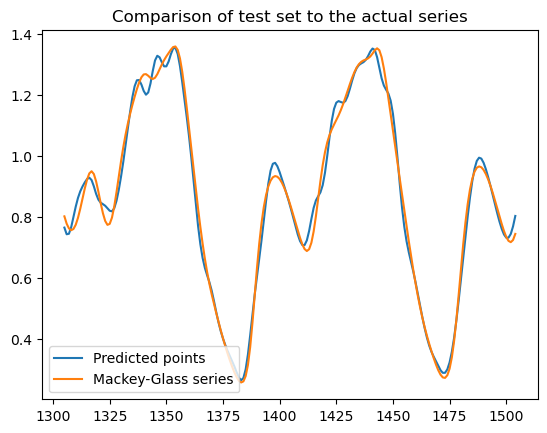

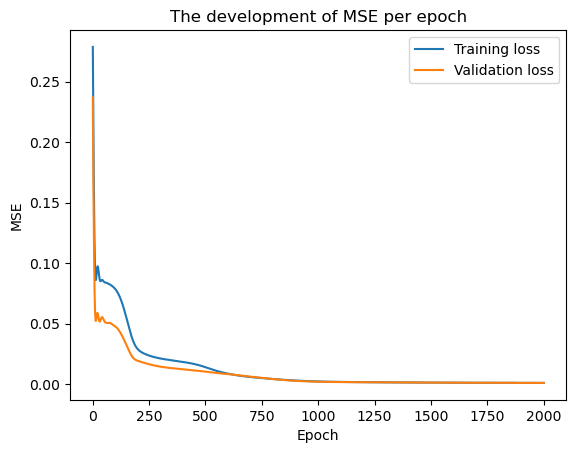

In [284]:
epochs = 2000
train_loss = np.zeros(epochs)
val_loss = np.zeros(epochs)
mlp = Network(hidden_1=3, hidden_2=4)

for epoch in range(epochs):

    mlp.train()
    #Forward
    out = mlp(train_batch)
    #Backward
    mlp.optimizer.zero_grad()
    loss = mlp.loss_criterion(train_targets,out)
    train_loss[epoch] = loss.detach().numpy()
    loss.backward()
    mlp.optimizer.step()

    # Calculate validation loss
    mlp.eval()
    with torch.no_grad():
        val_out = mlp(val_batch)
        val_loss_epoch = mlp.loss_criterion(val_targets,val_out)
        val_loss[epoch] = val_loss_epoch


data_points = mlp(test_batch).detach().numpy()

x_cords = np.arange(1305,1505)
plt.plot(x_cords, data_points, label="Predicted points")

plt.plot(x_cords, X[1305:1505], label= "Mackey-Glass series")
plt.title("Comparison of test set to the actual series")
plt.legend()
plt.show()


plot_learning_rate_list(mse_list=[train_loss,val_loss], epochs=  epochs,  title= "The development of MSE per epoch", ylabel="MSE", label_list=["Training loss", "Validation loss"])